# [클래스](https://ko.javascript.info/class)
- 실무에선 사용자나 물건같이 동일한 종류의 객체를 여러 개 생성해야 하는 경우가 잦습니다.
- 이럴 때 new 연산자와 생성자 함수에서 배운 new function을 사용할 수 있습니다.
- 여기에 더하여 모던 자바스크립트에 도입된 클래스(class)라는 문법을 사용하면 객체 지향 프로그래밍에서 사용되는 다양한 기능을 자바스크립트에서도 사용할 수 있습니다.

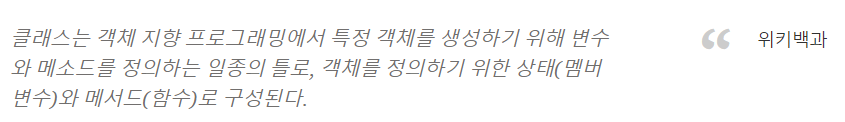

new User("John")를 호출하면 다음과 같은 일이 일어납니다.
1. 새로운 객체가 생성됩니다.
2. 넘겨받은 인수와 함께 constructor가 자동으로 실행됩니다. 이때 인수 "John"이 this.name에 할당됩니다.

이런 과정을 거친 후에 user.sayHi() 같은 객체 메서드를 호출할 수 있습니다.

```javascript
class User {
  // 생성자 메서드 
  constructor(name) { 
    this.name = name;
  }

  sayHi() {
    alert(this.name);
  }

}

// 사용법:
let John = new User("John");
alert(John.sayHi());

let James = new User("James");
alert(James.sayHi());
```

## getter, setter

```javascript
class User {

  constructor(name) {
    // setter를 활성화합니다.
    this.name = name;
  }

  // get 메서드 
  get name() {
    return this._name;
  }
  // set 메서드 
  set name(value) {
    if (value.length < 4) {
      alert("이름이 너무 짧습니다.");
      return;
    }
    this._name = value;
  }

}

let user = new User("보라");
alert(user.name); // 보라

user = new User(""); // 이름이 너무 짧습니다.
```

# [클래스 상속](https://ko.javascript.info/class-inheritance)

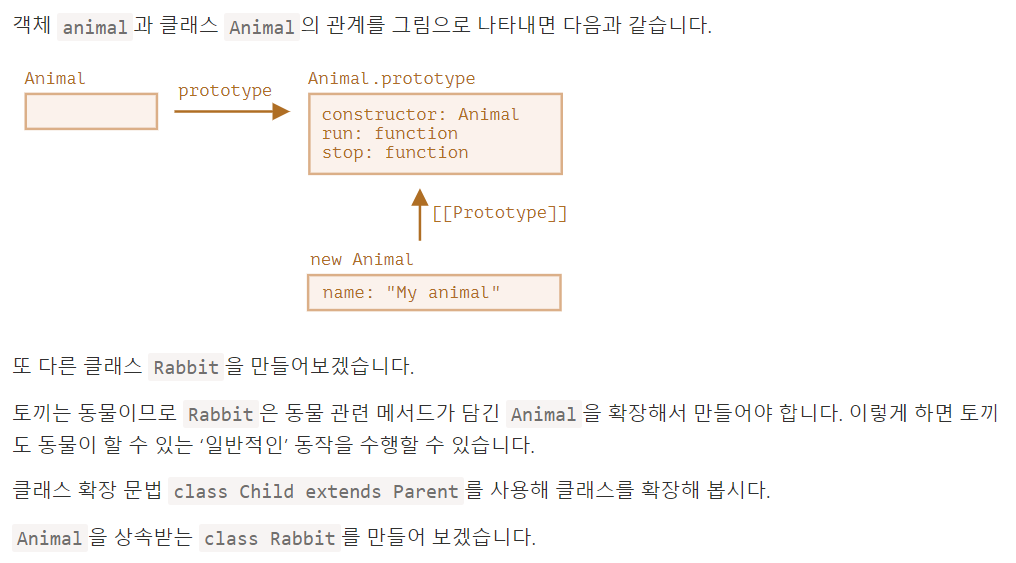

```javascript
class Animal {
  constructor(name) {
    this.speed = 0;
    this.name = name;
  }
  run(speed) {
    this.speed = speed;
    alert(`${this.name} 은/는 속도 ${this.speed}로 달립니다.`);
  }
  stop() {
    this.speed = 0;
    alert(`${this.name} 이/가 멈췄습니다.`);
  }
}

let animal = new Animal("동물");
```

```javascript
class Rabbit extends Animal {
  hide() {
    alert(`${this.name} 이/가 숨었습니다!`);
  }
}

let rabbit = new Rabbit("흰 토끼");

rabbit.run(5); // 흰 토끼 은/는 속도 5로 달립니다.
rabbit.hide(); // 흰 토끼 이/가 숨었습니다!
```

## 오버라이딩
개발을 하다 보면 부모 메서드 전체를 교체하지 않고, 부모 메서드를 토대로 일부 기능만 변경하고 싶을 때가 생깁니다. 부모 메서드의 기능을 확장하고 싶을 때도 있죠. 이럴 때 커스텀 메서드를 만들어 작업하게 되는데, 이미 커스텀 메서드를 만들었더라도 이 과정 전·후에 부모 메서드를 호출하고 싶을 때가 있습니다.

키워드 super는 이럴 때 사용합니다.
- super.method(...)는 부모 클래스에 정의된 메서드, method를 호출합니다.
- super(...)는 부모 생성자를 호출하는데, 자식 생성자 내부에서만 사용 할 수 있습니다.

```javascript
class Animal {

  constructor(name) {
    this.speed = 0;
    this.name = name;
  }

  run(speed) {
    this.speed = speed;
    alert(`${this.name}가 속도 ${this.speed}로 달립니다.`);
  }

  stop() {
    this.speed = 0;
    alert(`${this.name}가 멈췄습니다.`);
  }

}

class Rabbit extends Animal {
  hide() {
    alert(`${this.name}가 숨었습니다!`);
  }

  stop() {
    super.stop(); // 부모 클래스의 stop을 호출해 멈추고,
    this.hide(); // 숨습니다.
  }
}

let rabbit = new Rabbit("흰 토끼");

rabbit.run(5); // 흰 토끼가 속도 5로 달립니다.
rabbit.stop(); // 흰 토끼가 멈췄습니다. 흰 토끼가 숨었습니다!
```


# [instanceof](https://ko.javascript.info/instanceof)
instanceof 연산자를 사용하면 객체가 특정 클래스에 속하는지 아닌지를 확인할 수 있습니다.     
instanceof는 상속 관계도 확인해줍니다.

```javascript
class Rabbit {}
let rabbit = new Rabbit();

// rabbit이 클래스 Rabbit의 객체인가요?
alert( rabbit instanceof Rabbit ); // true
```

```javascript
// 클래스가 아닌 생성자 함수
function Rabbit() {}

alert( new Rabbit() instanceof Rabbit ); // true
```

```javascript
// Array 같은 내장 클래스에도 사용가능 
let arr = [1, 2, 3];
alert( arr instanceof Array ); // true
alert( arr instanceof Object ); // true
```